# 主成分分析与因子分析
## 区别
**主成分分析**：最终确定的新变量是原始变量的线性组合（常用）\
**因子分析**：利用少数几个公共因子去解释较多个要观测变量中存在的复杂关系
## 主成分分析法
### 基本原理
通过少数几个主成分来解释多个变量间的内部结构\
目的：数据压缩；数据解释
### 数学模型
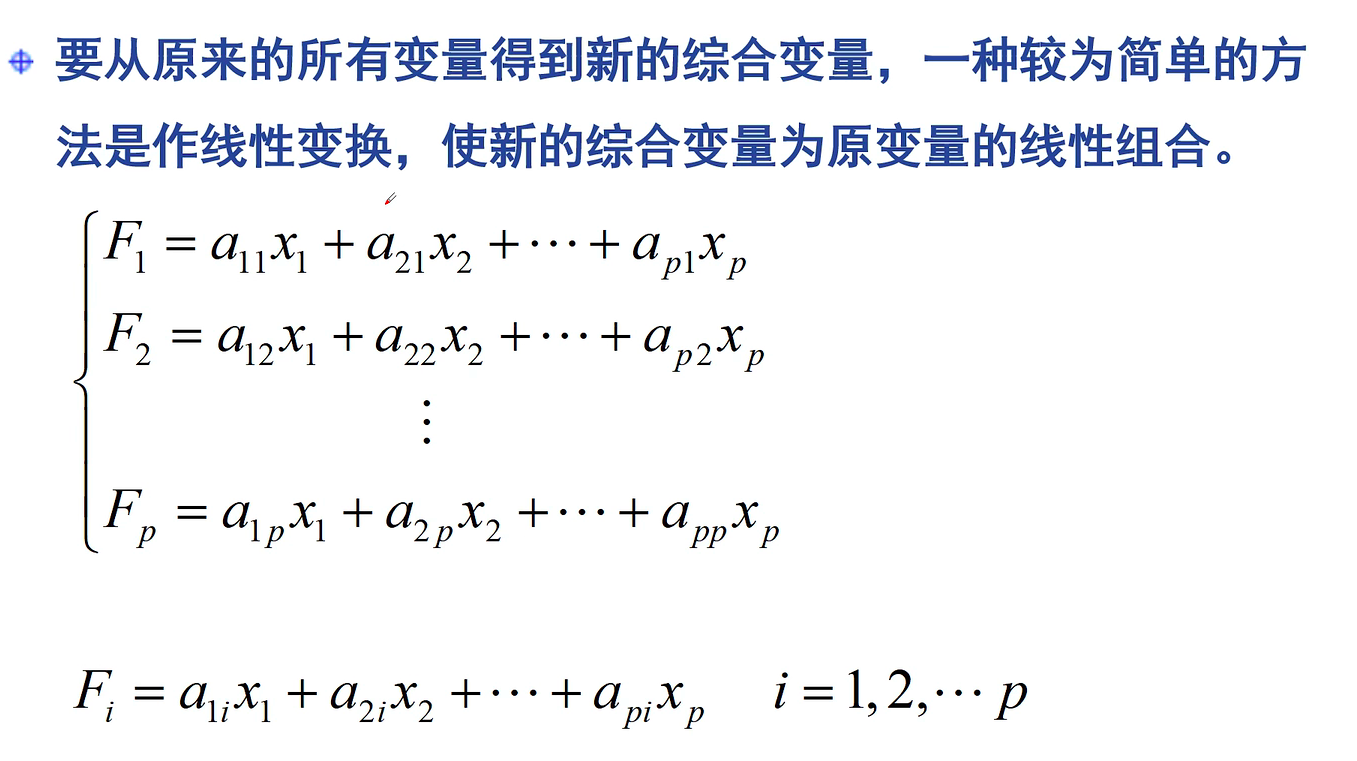
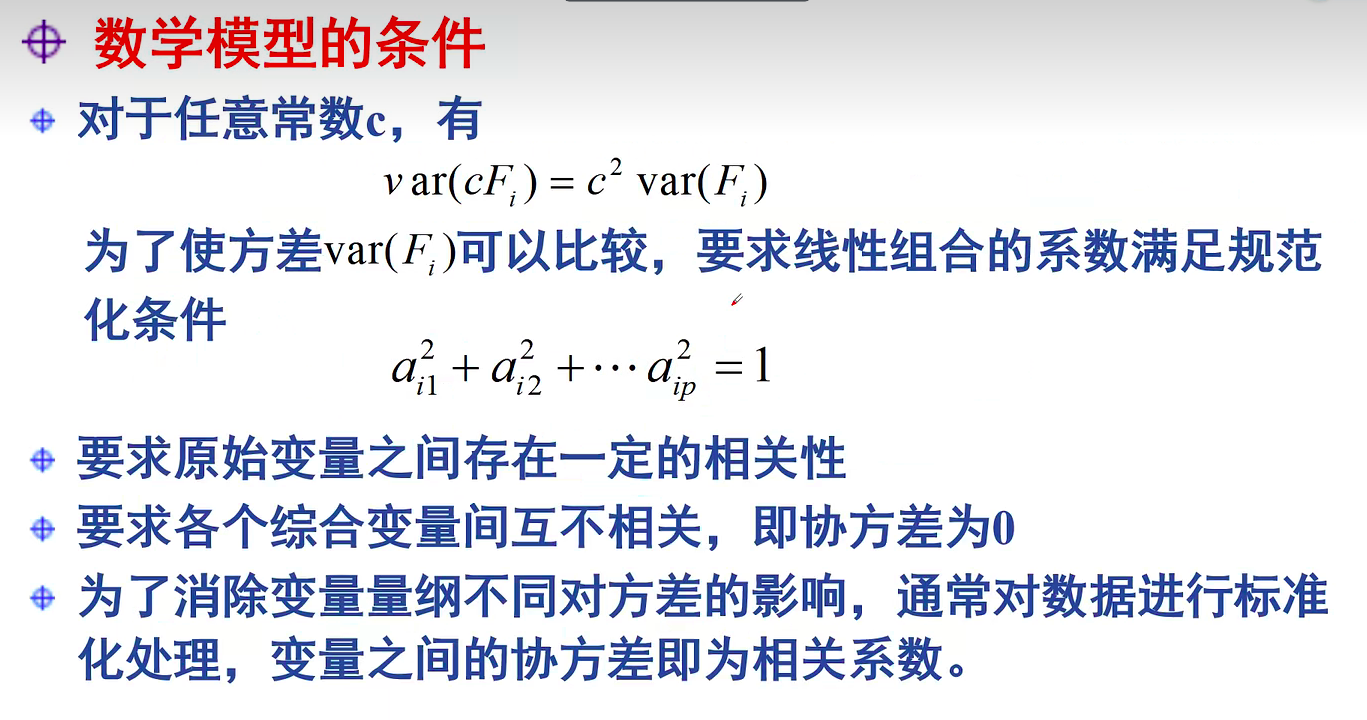
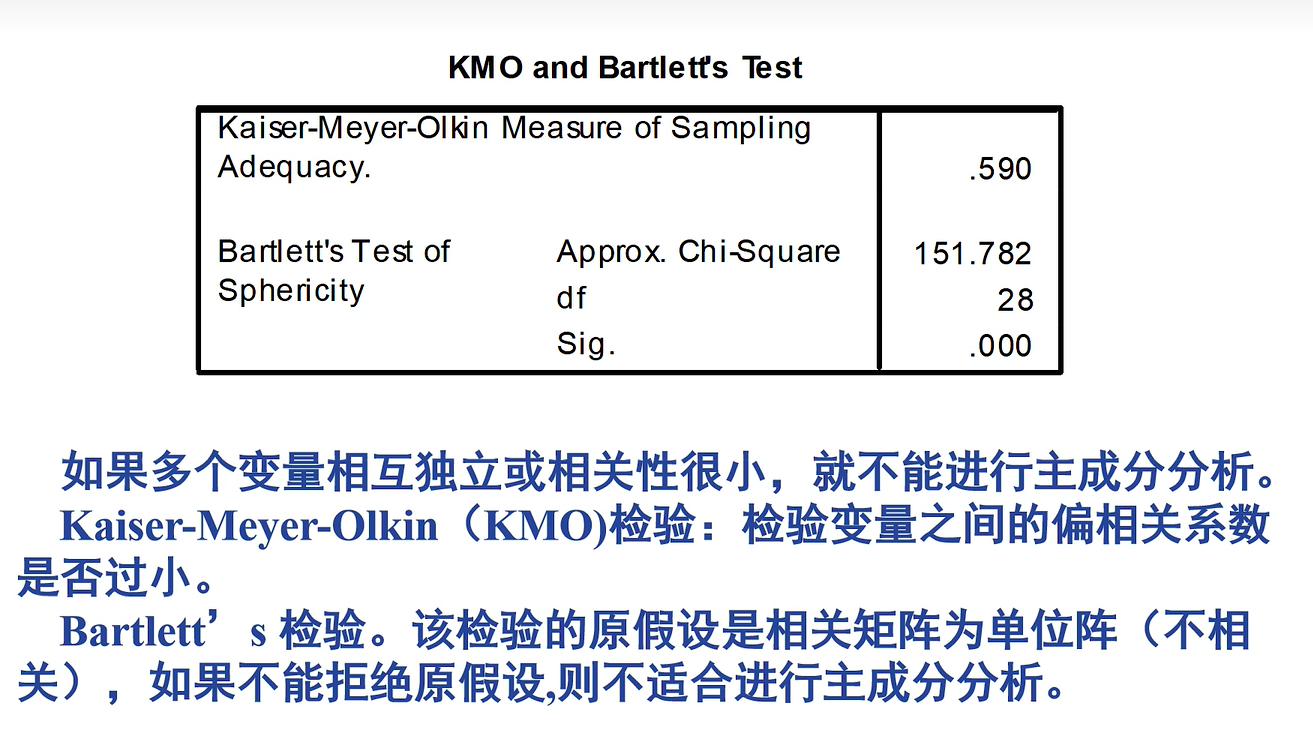
KMO>0.5 推荐\
0.3<KMO<0.5 适合但不推荐\
Bartlett<0.05 推荐\
两个检验满足一个即可\
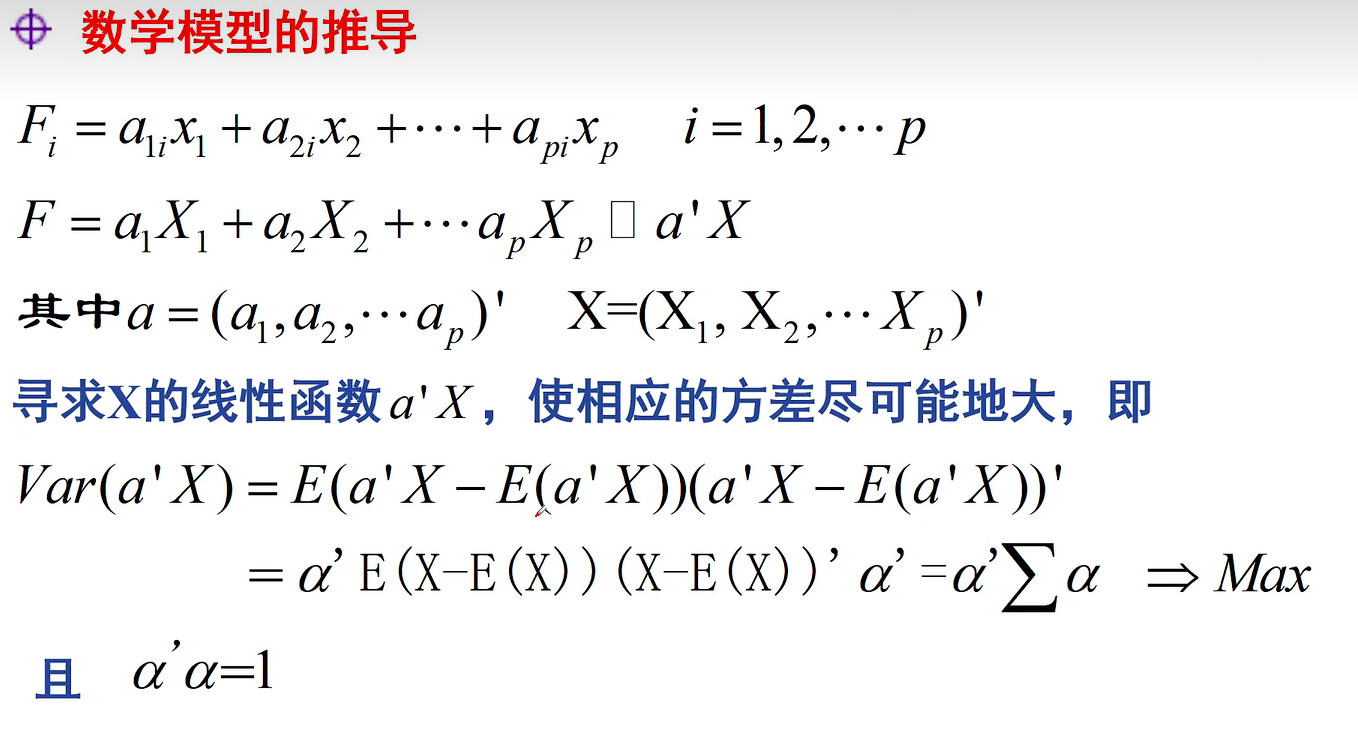
### 步骤
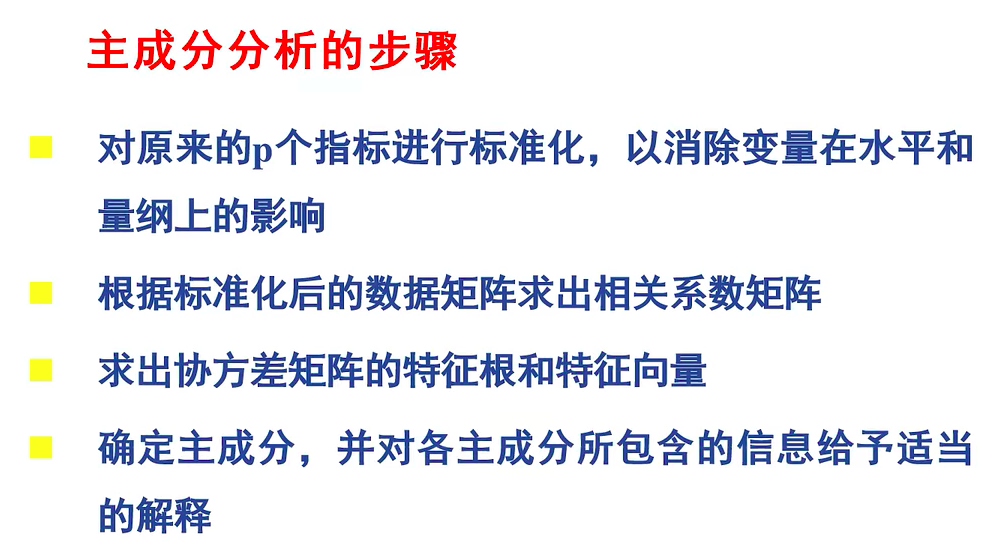
### 案例
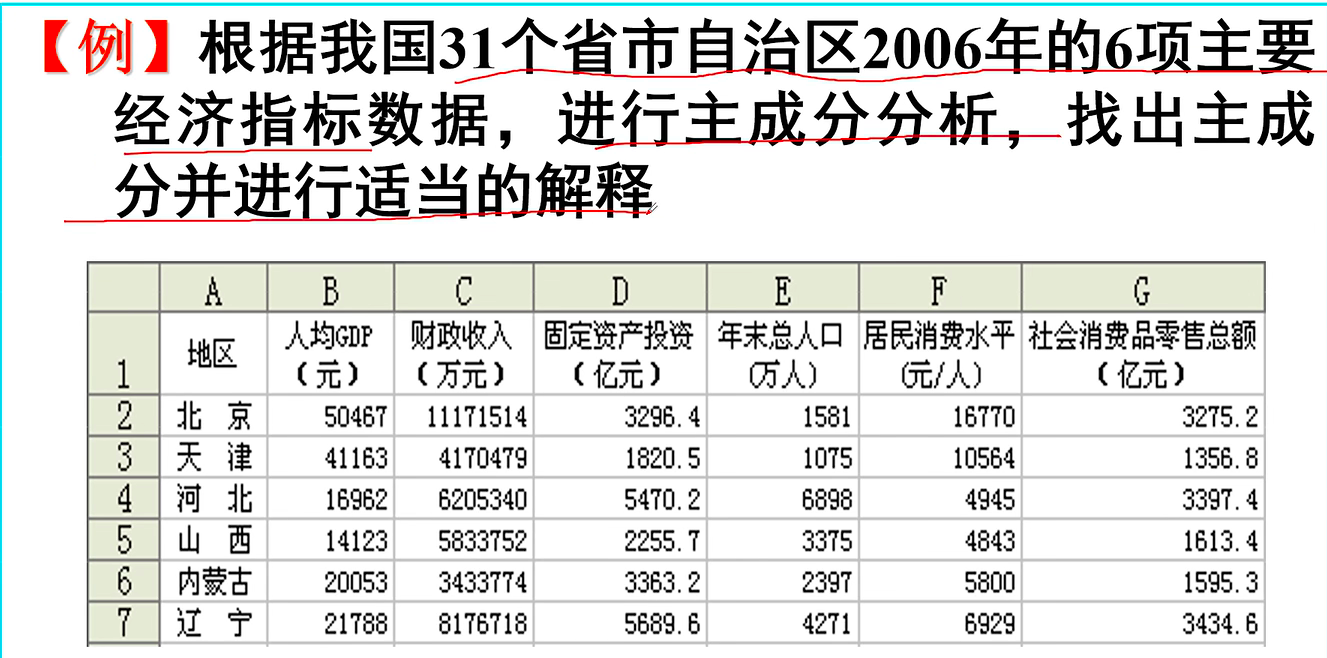

In [66]:
# 数据处理
import pandas as pd
import numpy as np
 
# 绘图
import seaborn as sns
import matplotlib.pyplot as plt
 
# df = pd.read_csv(r"D:\桌面\aa.csv", encoding='gbk', index_col=0).reset_index(drop=True)
df = pd.DataFrame(
    {
        '人均GDP':[50467,41163,16962,14123,20053,21788],
        '财政收入':[11171514,4170479,6205340,5833752,3433774,8176718],
        '固定资产投资':[3296.4,1820.5,5470.2,2255.7,3363.2,5689.6],
        '年末总人口':[1581,1075,6898,3375,2397,4271],
        '居民消费水平':[16770,10564,4945,4843,5800,6929],
        '社会消费品零售总额':[3275.2,1356.8,3397.4,1613.4,1595.3,3434.6]
    },
    index=['Beijing','Tianjing','HeBei','Shangxi','NeiMeng','Liaoning']
)
print(f"原始数据:\n{df}")
print('The shape of dataset: ', df.shape)


原始数据:
          人均GDP      财政收入  固定资产投资  年末总人口  居民消费水平  社会消费品零售总额
Beijing   50467  11171514  3296.4   1581   16770     3275.2
Tianjing  41163   4170479  1820.5   1075   10564     1356.8
HeBei     16962   6205340  5470.2   6898    4945     3397.4
Shangxi   14123   5833752  2255.7   3375    4843     1613.4
NeiMeng   20053   3433774  3363.2   2397    5800     1595.3
Liaoning  21788   8176718  5689.6   4271    6929     3434.6
The shape of dataset:  (6, 6)


In [67]:
 
# Bartlett's球状检验
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
 
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(f"Bartlett's球状检验:\n{chi_square_value, p_value}")
 


Bartlett's球状检验:
(nan, nan)


C:\Users\ease\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


In [68]:
# KMO检验
# 检查变量间的相关性和偏相关性，取值在0-1之间；KOM统计量越接近1，变量间的相关性越强，偏相关性越弱，因子分析的效果越好。
# 通常取值从0.6开始进行因子分析
from factor_analyzer.factor_analyzer import calculate_kmo
 
kmo_all, kmo_model = calculate_kmo(df)
print(f"KMO检验:\n{kmo_all}")


KMO检验:
[0.2625915  0.21151744 0.24487636 0.26338939 0.27366883 0.24782395]


In [72]:
 
#标准化
 
#所需库
from sklearn import preprocessing
#进行标准化
df = preprocessing.scale(df)
print(df)
 
#求解系数相关矩阵
covX = np.around(np.corrcoef(df.T),decimals=3)
print(covX)
 
#求解特征值和特征向量
featValue, featVec=  np.linalg.eig(covX.T)  #求解系数相关矩阵的特征值和特征向量
print(featValue, featVec)


[[ 1.70775138  1.80995956 -0.23998869 -0.86813152  1.99252592  0.89358873]
 [ 1.0181581  -0.90174877 -1.24376531 -1.12880279  0.53112831 -1.1724078 ]
 [-0.77557009 -0.1135868   1.23843777  1.87097753 -0.79204171  1.02519047]
 [-0.98599091 -0.25751385 -0.94778077  0.05606665 -0.81606081 -0.89606569]
 [-0.54647155 -1.18709645 -0.19455724 -0.44776044 -0.59070511 -0.91555825]
 [-0.41787693  0.64998632  1.38765424  0.51765057 -0.3248466   1.06525254]]
[[ 1.     0.482 -0.363 -0.685  0.97   0.079]
 [ 0.482  1.     0.321  0.015  0.653  0.761]
 [-0.363  0.321  1.     0.78  -0.28   0.836]
 [-0.685  0.015  0.78   1.    -0.627  0.563]
 [ 0.97   0.653 -0.28  -0.627  1.     0.212]
 [ 0.079  0.761  0.836  0.563  0.212  1.   ]]
[3.04211170e+00 2.59548070e+00 2.30050340e-01 1.26782237e-01
 5.01304887e-03 5.61974545e-04] [[-0.50282696 -0.25180518 -0.47171903  0.32447964 -0.5882209  -0.09974718]
 [-0.12610962 -0.56723555  0.70164686 -0.15126061 -0.24551496 -0.29474483]
 [ 0.42147726 -0.37729273 -0.509319

In [70]:
''' 
#不标准化
#均值
def meanX(dataX):
    return np.mean(dataX,axis=0)#axis=0表示依照列来求均值。假设输入list,则axis=1
average = meanX(df)
print(average)
 
#查看列数和行数
m, n = np.shape(df)
print(m,n)
 
#均值矩阵
data_adjust = []
avgs = np.tile(average, (m, 1))
print(avgs)
 
#去中心化
data_adjust = df - avgs
print(data_adjust)
 
#协方差阵
covX = np.cov(data_adjust.T)   #计算协方差矩阵
print(covX)
 
#计算协方差阵的特征值和特征向量
featValue, featVec=  np.linalg.eig(covX)  #求解协方差矩阵的特征值和特征向量
print(featValue, featVec)
 '''


' \n#不标准化\n#均值\ndef meanX(dataX):\n    return np.mean(dataX,axis=0)#axis=0表示依照列来求均值。假设输入list,则axis=1\naverage = meanX(df)\nprint(average)\n \n#查看列数和行数\nm, n = np.shape(df)\nprint(m,n)\n \n#均值矩阵\ndata_adjust = []\navgs = np.tile(average, (m, 1))\nprint(avgs)\n \n#去中心化\ndata_adjust = df - avgs\nprint(data_adjust)\n \n#协方差阵\ncovX = np.cov(data_adjust.T)   #计算协方差矩阵\nprint(covX)\n \n#计算协方差阵的特征值和特征向量\nfeatValue, featVec=  np.linalg.eig(covX)  #求解协方差矩阵的特征值和特征向量\nprint(featValue, featVec)\n '

[3.0421117000543156, 2.5954806998950146, 0.23005033965869878, 0.12678223698024993, 0.0050130488663656615, 0.0005619745453551207]


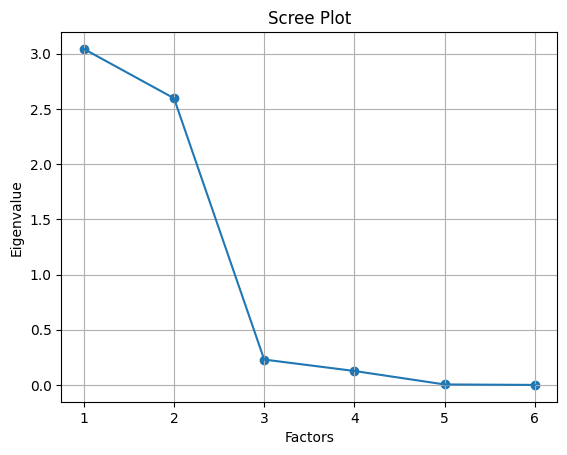

[5.07018617e-01 4.32580117e-01 3.83417233e-02 2.11303728e-02
 8.35508144e-04 9.36624242e-05]
[0.50701862 0.93959873 0.97794046 0.99907083 0.99990634 1.        ]
[0, 1]
[[-0.50282696 -0.25180518]
 [-0.12610962 -0.56723555]
 [ 0.42147726 -0.37729273]
 [ 0.53180644 -0.1544701 ]
 [-0.47916996 -0.33536989]
 [ 0.20296894 -0.57978807]]


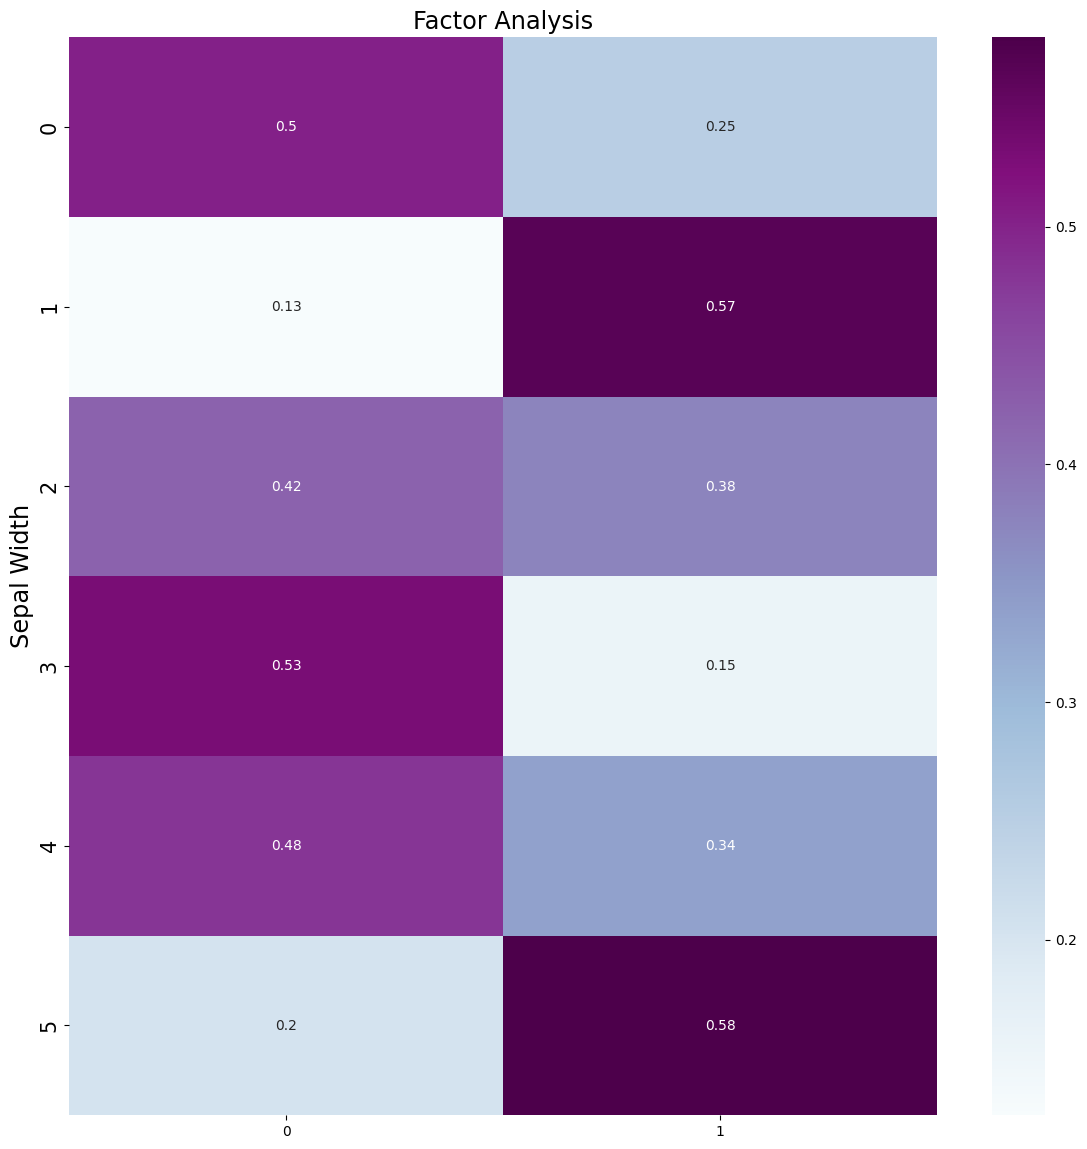

[[-2.42317226 -2.41837299]
 [-2.01522464  1.40037997]
 [ 2.50887762 -0.82530687]
 [ 0.36776468  1.53648922]
 [ 0.20157982  1.68247277]
 [ 1.36017478 -1.3756621 ]]


In [79]:
####下面没有区分#######
#对特征值进行排序并输出 降序
featValue = sorted(featValue)[::-1]
print(featValue)
 
#绘制散点图和折线图
# 同样的数据绘制散点图和折线图
plt.scatter(range(1, df.shape[1] + 1), featValue)
plt.plot(range(1, df.shape[1] + 1), featValue)
 
# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
 
plt.grid()  # 显示网格
plt.show()  # 显示图形
 
#求特征值的贡献度
gx = featValue/np.sum(featValue)
print(gx)
 
#求特征值的累计贡献度
lg = np.cumsum(gx)
print(lg)
 
#选出主成分
k=[i for i in range(len(featValue)) if featValue[i]>1]
k = list(k)
print(k)
 
#选出主成分对应的特征向量矩阵
selectVec = np.matrix(featVec.T[k]).T
selectVe=abs(selectVec)
print(selectVec)
 
 
#绘制热力图
 
plt.figure(figsize = (14,14))
ax = sns.heatmap(selectVe, annot=True, cmap="BuPu")
 
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")
 
# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()
 
# 保存图片
# plt.savefig("factorAnalysis", dpi=500)
# 打印降维后数据
print(df*selectVec)